In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from os.path import join
import numpy as np
from keras import optimizers, losses, activations, models
import keras
from sklearn.preprocessing import LabelBinarizer

In [46]:
import matplotlib.pyplot as plt
!pip install lime
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import mark_boundaries


In [0]:


#audioPath = r"drive/My Drive/Project"

#training = np.load(join(audioPath, 'training.npz'))['arr_0']
training = np.load('/content/drive/My Drive/training.npz')['arr_0']
#validation = np.load(join(audioPath, 'validation.npz'))['arr_0']
validation = np.load('/content/drive/My Drive/validation.npz')['arr_0']


x_train = []
y_train = []
x_val = []
y_val = []

for example in training:
  x_train.append(example['data'])
  y_train.append(example['label'])

for example in validation:
  x_val.append(example['data'])
  y_val.append(example['label'])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)


lb = LabelBinarizer() #one-hot encoding the label for softmax function
lb.fit([i for i in range(30)])
y_train = lb.transform(y_train)

lb.fit([i for i in range(30)])
y_val = lb.transform(y_val)

#model archetecture starts

model = keras.models.Sequential()
model.add(keras.layers.GRU(256, input_shape=(99, 13)))
model.add(keras.layers.Dense(30, activation = 'softmax'))
model.compile(optimizer = 'nadam',  loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])
model.summary()
model.fit(x_train, y_train, batch_size = 60, epochs= 10, verbose = 1, validation_data = (x_val, y_val))
train_score = model.evaluate(x_train, y_train, batch_size= 60)
validation_score = model.evaluate(x_val, y_val, batch_size=60)

print ("accuracy : train -", train_score," validation -", validation_score)

In [0]:
#training = np.load(join(audioPath, 'training.npz'))['arr_0']
training = np.load('/content/drive/My Drive/training.npz')['arr_0']
#validation = np.load(join(audioPath, 'validation.npz'))['arr_0']
validation = np.load('/content/drive/My Drive/validation.npz')['arr_0']


x_train = []
y_train = []
x_val = []
y_val = []

for example in training:
  x_train.append(example['data'])
  y_train.append(example['label'])

for example in validation:
  x_val.append(example['data'])
  y_val.append(example['label'])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [0]:
x_vectors_train=[]
for i in x_train:
  a=[]
  for j in i:
    for k in j:
      a.append(k)
  x_vectors_train.append(a)
x_vectors_test=[]
for i in x_val:
  a=[]
  for j in i:
    for k in j:
      a.append(k)
  x_vectors_test.append(a)

In [0]:
x_vectors_train=np.array(x_vectors_train)
x_vectors_test=np.array(x_vectors_test)

In [72]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='scale')
clf.fit(x_vectors_train,y_train)
pred_svm = clf.predict(x_vectors_test)
print(sum(y_val==pred_svm)/len(y_val))

0.7653283378056808


In [0]:
model.save('/content/drive/My Drive/rnn_model.h5')

In [0]:
from lime.lime_image import LimeImageExplainer

In [0]:
#
explainer = LimeImageExplainer()

In [0]:
def user_defined(array):
  test=np.zeros((99,13),float)
  for i in range(99):
    for j in range(13):
      test[i][j] = array[0][i][j][0]
  te = []
  te.append(test)
  te = np.array(te)
  return model.predict(te)

In [0]:
explanation_1 = explainer.explain_instance(x_train[0], user_defined, 
                                         top_labels=2, num_samples=1,
                                         random_seed=42)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


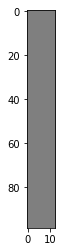

In [0]:
temp, mask = explanation_1.get_image_and_mask(explanation_1.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

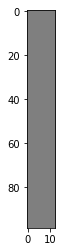

In [0]:
temp, mask = explanation_1.get_image_and_mask(explanation_1.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))